In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from sklearn import preprocessing
import keras
import numpy as np

In [ ]:
url="https://tfhub.dev/google/universal-sentence-encoder-large/3"
embed=hub.KerasLayer(url)


In [ ]:
import io
from google.colab import files
uploaded = files.upload()

Saving Data_test.xlsx to Data_test.xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(uploaded['Data_test.xlsx']))
df.head(5)

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I‚Äôm so lostHello, my name is Adam (16) and I...",suicide


In [ ]:
###Drop Nan Values
df=df.dropna()

In [ ]:

x=list(df['text'])
x

["Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she began threatening suicide. I have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe I'll come back. I know a lot of people will threaten this in order to get their way, but what happens if she really does? What do I do and how am I supposed to handle her death on my hands? I still love my wife but I cannot deal with getting cheated on again and constantly feeling insecure. I'm worried today may be the day she does it and I hope so much it doesn't happen.",
 "Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it",
 'Finally 2020 is almost over... So I can never hear "2020 has been a bad year" ever again. I swear to fucking God it\'s so annoying',
 '

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
### Vocabulary size
voc_size=5000

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(x)):
    print(i)
    review = re.sub('[^a-zA-Z0-9]', ' ', x[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
43910
43911
43912
43913
43914
43915
43916
43917
43918
43919
43920
43921
43922
43923
43924
43925
43926
43927
43928
43929
43930
43931
43932
43933
43934
43935
43936
43937
43938
43939
43940
43941
43942
43943
43944
43945
43946
43947
43948
43949
43950
43951
43952
43953
43954
43955
43956
43957
43958
43959
43960
43961
43962
43963
43964
43965
43966
43967
43968
43969
43970
43971
43972
43973
43974
43975
43976
43977
43978
43979
43980
43981
43982
43983
43984
43985
43986
43987
43988
43989
43990
43991
43992
43993
43994
43995
43996
43997
43998
43999
44000
44001
44002
44003
44004
44005
44006
44007
44008
44009
44010
44011
44012
44013
44014
44015
44016
44017
44018
44019
44020
44021
44022
44023
44024
44025
44026
44027
44028
44029
44030
44031
44032
44033
44034
44035
44036
44037
44038
44039
44040
44041
44042
44043
44044
44045
44046
44047
44048
44049
44050
44051
44052
44053
44054
44055
44056
44057
44058
44059
44060
44061
44062
44063
44064
44065
44066
44067
4

In [ ]:
df['updated_text']=corpus

In [ ]:
df_bkp=df

In [ ]:
df_bkp.drop("text", axis=1, inplace=True)

In [ ]:
df_bkp

,class,updated_text
0,suicide,ex wife threaten suiciderec left wife good che...
1,non-suicide,weird get affect compliment come someon know i...
2,non-suicide,final 2020 almost never hear 2020 bad year eve...
3,suicide,need helpjust help im cri hard
4,suicide,losthello name adam 16 struggl year afraid pas...
...,...,...
48905,suicide,contempl suicidei mid late 20 musician primari...
48906,suicide,realli live guess still alivemi mind undersand...
48907,suicide,againit matter 5 day 20 day 30 day done mani t...
48908,non-suicide,opinion need realli rake cold hard cah rel chr...


In [ ]:
df_bkp.rename(columns = {'updated_text':'text'}, inplace = True)

In [ ]:
df_bkp
print(df_bkp['text'][0])

ex wife threaten suiciderec left wife good cheat twice lie much decid refus go back day ago began threaten suicid tirelessli spent paat day talk keep hesit want believ come back know lot peopl threaten order get way happen realli suppos handl death hand still love wife cannot deal get cheat constantli feel insecur worri today may day hope much happen


In [ ]:
df_bkp1=df

In [ ]:
df=df_bkp

In [ ]:
###Drop Nan Values
df=df.dropna()
df

,class,text
0,suicide,ex wife threaten suiciderec left wife good che...
1,non-suicide,weird get affect compliment come someon know i...
2,non-suicide,final 2020 almost never hear 2020 bad year eve...
3,suicide,need helpjust help im cri hard
4,suicide,losthello name adam 16 struggl year afraid pas...
...,...,...
48905,suicide,contempl suicidei mid late 20 musician primari...
48906,suicide,realli live guess still alivemi mind undersand...
48907,suicide,againit matter 5 day 20 day 30 day done mani t...
48908,non-suicide,opinion need realli rake cold hard cah rel chr...


In [ ]:
x=list(df['text'])
x
y=list(df['class'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

In [ ]:
def encode(le,labels):
  enc=le.transform(labels)
  return keras.utils.np_utils.to_categorical(enc)

In [ ]:
def decode(le,one_hot):
  dec=np.argmax(one_hot,axis=1)
  return le.inverse_transform(dec)

In [ ]:
x_enc = x
y_enc = encode(le,y)

x_train = np.asarray(x_enc[:39128])
y_train = np.asarray(y_enc[:39128])

x_test=np.asarray(x_enc[39128:])
y_test=np.asarray(y_enc[39128:])

In [ ]:
from keras.layers import Input,Lambda, Dense
from keras.models import Model
import keras.backend as K


In [ ]:
def UniversalEmbedding(x):
  return embed(tf.squeeze(tf.cast(x,tf.string)))

In [ ]:
input_text = Input(shape=(1,),dtype=tf.string)
embedding=Lambda(UniversalEmbedding,output_shape=(512,))(input_text)
dense=Dense(256,activation='relu')(embedding)
pred=Dense(2,activation='sigmoid')(dense)
model=Model(inputs=[input_text],outputs=pred)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 lambda (Lambda)             (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 131,842
Trainable params: 131,842
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_train,y_train,epochs=10,batch_size=12, validation_data=(x_test, y_test))

Epoch 1/10
3261/3261 [==============================] - 209s 64ms/step - loss: 0.2376 - accuracy: 0.9051
Epoch 2/10
3261/3261 [==============================] - 212s 65ms/step - loss: 0.2206 - accuracy: 0.9110
Epoch 3/10
3261/3261 [==============================] - 210s 64ms/step - loss: 0.2066 - accuracy: 0.9189
Epoch 4/10
3261/3261 [==============================] - 209s 64ms/step - loss: 0.1951 - accuracy: 0.9248
Epoch 5/10
3261/3261 [==============================] - 206s 63ms/step - loss: 0.1835 - accuracy: 0.9287
Epoch 6/10
3261/3261 [==============================] - 206s 63ms/step - loss: 0.1726 - accuracy: 0.9337
Epoch 7/10
3261/3261 [==============================] - 210s 64ms/step - loss: 0.1599 - accuracy: 0.9393
Epoch 8/10
3261/3261 [==============================] - 208s 64ms/step - loss: 0.1486 - accuracy: 0.9435
Epoch 9/10
3261/3261 [==============================] - 207s 64ms/step - loss: 0.1380 - accuracy: 0.9479
Epoch 10/10
3261/3261 [==============================] 

In [ ]:
predicts=model.predict(x_test,batch_size=12)

In [ ]:
y_test=decode(le,y_test)
y_preds=decode(le,predicts)
y_preds

array(['non-suicide', 'suicide', 'suicide', ..., 'suicide', 'non-suicide',
       'suicide'], dtype='<U11')

In [ ]:
from sklearn import metrics

In [ ]:
cm_RF=metrics.confusion_matrix(y_test,y_preds)

In [ ]:
print(metrics.classification_report(y_test,y_preds))

              precision    recall  f1-score   support

 non-suicide       0.92      0.89      0.91      4863
     suicide       0.90      0.93      0.91      4919

    accuracy                           0.91      9782
   macro avg       0.91      0.91      0.91      9782
weighted avg       0.91      0.91      0.91      9782



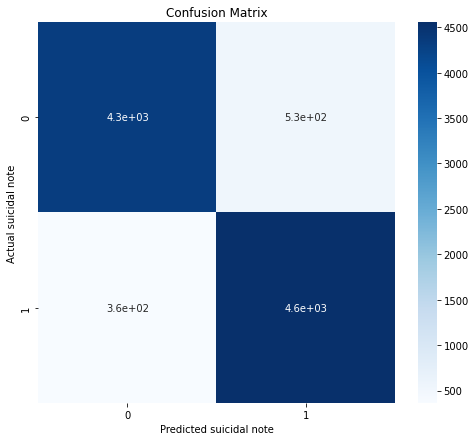

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Plotting the confusion matrix
plt.figure(figsize=(8,7))
sns.heatmap(cm_RF, annot=True,cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual suicidal note')
plt.xlabel('Predicted suicidal note')
plt.show()

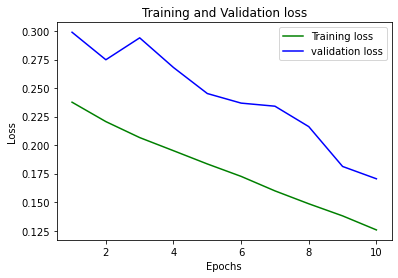

In [39]:
import matplotlib.pyplot as plt
 
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

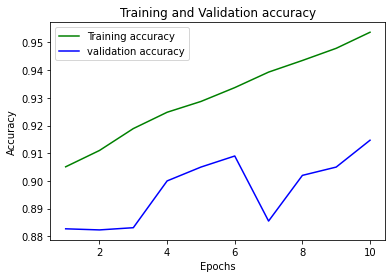

In [40]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()